# Project 5


- In this project we will use k mean clustering to detect the voalatility of a sector of stocks.
- In this project we are using linear regression to help detect mommentum in stocks and possbile things you can use to help someone in their endevor in the stock market. (optional)
- The project uses data from alpaca and uses this article as a basis and is going to be more than what the author purpose dureing extraction of this data.
- we may use google trends information and reddit growth to help give more confidence in our inference and how we can use it to detect alpha.

- we could include information from new(aka fud and options) to help but this will proably be just a optional if the above is completed.

- this is just a set of tool to use to help with your analysis in the stock and cannot guarentee alpha.


## Links:
- https://alpaca.markets/learn/linear-regression-zipline-trader/ (source for code)
- https://alpaca.markets/ (source for data)
- https://pythonforfinance.net/2018/02/08/stock-clusters-using-k-means-algorithm-in-python/ ( k mean clustering)
- https://towardsdatascience.com/using-google-trends-data-to-leverage-your-predictive-model-a56635355e3d (link for using google search data in linear regression)
- https://medium.com/uptick-blog/stock-picks-using-k-means-clustering-4330c6c4e8de  (Stock Picks using K-Means Clustering)
  - https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb (code for the article above ^)
- https://www.mlq.ai/stock-market-clustering-with-k-means/ (intresting article using some ai algorithms)


## Process:
- Take a sector of stocks in a exchange like the nyse, dows, russell,etc. (use stock screeners to help decide dataset)
- Prepare the linear regession on the stocks we picked with data
- Look at what is looking good over a 6-18  month period.
- Use g trend information to find possible information about trends in their sectors

## Examples:
- Use abercrombie comming back from the dead. linear regession and google trends with 90's and leather pants
- Use LAC information to tell the story of how lithium can be a play for the future vs tesla, lucid and rivian as comparision
- Use a example from your analysis from the stock exhange you choose and use the method your thinking about

## Talking about it:
- inform this method has not been proven and does not guarentee any money
- does not take fundamentals or too many technicals in place.
- market conditions can change and can affect investments regardless.
- talk about the technicals (linear and google trends), connecting it with how the market is working and what could affect the trade and short term and long term
- talk about google trends flaws with examples of chipotole and the lettuce problems or lulu lemon see through pants. (negative sediment) and lip balm (high chart but from only new york hmm?)
- 

In [1]:
# imports 
import pandas as pd
from numpy import vstack,array
from numpy.random import rand
import numpy as np
import seaborn as sns
import os
import datetime
from matplotlib import pyplot as plt
from pylab import plot, show
from scipy.cluster.vq import kmeans, vq
from math import sqrt
import pandas_datareader  as dr 
from sklearn.cluster import KMeans


In [2]:
#  
snp_500_company_list= "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

companyListDatabase=pd.read_html(snp_500_company_list)
tickers=companyListDatabase[0][1:]["Symbol"].values

priceList=[]
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        priceList.append(prices) 

    except:
        pass
    prices_df=pd.concat(priceList,axis=1)

prices_df.sort_index(inplace=True)





In [3]:
# look at the head of our dataset

prices_df.head()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,35.741619,49.596878,112.360001,107.657799,35.534641,103.480003,11.43,166.497482,9.797544,30.995420,...,115.535164,81.032707,35.631283,55.070808,46.764503,57.956955,86.250000,99.637405,38.806141,51.970360
2017-01-04,36.025356,50.296204,115.739998,107.916634,36.232922,104.139999,11.43,167.863831,9.713519,31.279747,...,116.960121,83.645470,35.789192,54.669926,47.461498,58.167839,87.029999,100.553467,39.363338,52.474648
2017-01-05,36.336552,50.677654,114.809998,106.298889,36.795425,105.910004,11.24,167.746704,9.587478,31.075384,...,118.085098,84.720230,35.789192,54.007980,47.028236,58.360390,84.750000,101.199516,38.725262,52.300079
2017-01-06,37.325050,50.693554,115.419998,107.509903,36.766335,108.300003,11.32,165.550797,9.931990,31.182009,...,118.853851,85.637459,35.894444,55.052166,46.698578,59.066399,85.959999,101.209167,38.976894,52.464951
2017-01-09,37.288437,51.027321,117.110001,106.308159,36.562668,108.570000,11.49,165.453186,9.688307,30.884354,...,118.131989,85.933945,35.350582,55.061493,46.500774,59.231438,85.970001,103.176254,38.554516,52.319485


In [4]:
# calculate the  average annual percentage return and volatilities over a year

returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

Text(0.5, 1.0, 'Elbow curve')

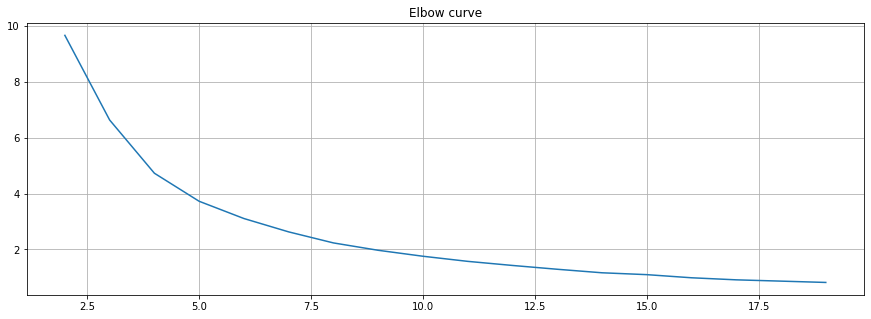

In [5]:
# Format data as numpy array to feed into the k means algorithm

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')


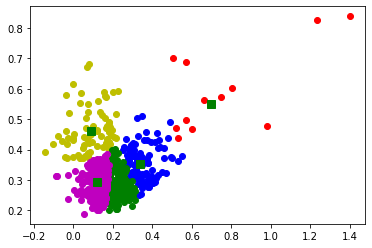

In [6]:
#computing the k means 

centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [7]:
#identify the outlier
print(returns.idxmax())

Returns       ENPH
Volatility    ENPH
dtype: object


In [8]:
#drop the relevant stock from our data
returns.drop('ENPH',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T


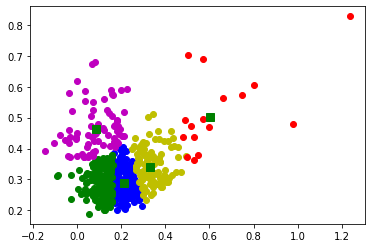

In [9]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [20]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

listOne=[]
for detail in details:
    print(detail)

('ABT', 1)
('ABBV', 0)
('ABMD', 1)
('ACN', 0)
('ATVI', 0)
('ADBE', 1)
('AMD', 2)
('AAP', 3)
('AES', 0)
('AFL', 0)
('A', 0)
('APD', 0)
('AKAM', 3)
('ALK', 4)
('ALB', 1)
('ARE', 0)
('ALGN', 2)
('ALLE', 0)
('LNT', 3)
('ALL', 3)
('GOOGL', 1)
('GOOG', 1)
('MO', 3)
('AMZN', 1)
('AMCR', 3)
('AEE', 0)
('AAL', 4)
('AEP', 3)
('AXP', 0)
('AIG', 4)
('AMT', 0)
('AWK', 0)
('AMP', 1)
('ABC', 3)
('AME', 0)
('AMGN', 3)
('APH', 0)
('ADI', 0)
('ANSS', 1)
('ANTM', 1)
('AON', 0)
('AOS', 0)
('APA', 4)
('AAPL', 1)
('AMAT', 1)
('APTV', 1)
('ADM', 3)
('ANET', 1)
('AJG', 0)
('AIZ', 0)
('T', 3)
('ATO', 3)
('ADSK', 1)
('ADP', 0)
('AZO', 0)
('AVB', 3)
('AVY', 1)
('BKR', 4)
('BLL', 0)
('BAC', 0)
('BBWI', 4)
('BAX', 0)
('BDX', 3)
('BBY', 1)
('BIO', 1)
('TECH', 1)
('BIIB', 4)
('BLK', 0)
('BK', 3)
('BA', 4)
('BKNG', 3)
('BWA', 3)
('BXP', 3)
('BSX', 0)
('BMY', 3)
('AVGO', 1)
('BR', 0)
('BRO', 0)
('CHRW', 3)
('CDNS', 1)
('CZR', 2)
('CPB', 3)
('COF', 0)
('CAH', 3)
('KMX', 0)
('CCL', 4)
('CARR', 2)
('CTLT', 1)
('CAT', 0)


In [11]:
#save database for future use

sp500List=pd.DataFrame(prices_df)
sp500List.to_csv("sp500List.csv")